# Make Supplemental Figure 1

This notebook graphs the cis effect of EGFR copy number and phosphoproteomics. It graphs sites Y1197, Y1172, Y1110, Y1092, Y1069, Y1016, Y869 if there is enough data available [cite].

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def print_stats(df1, x_axis, y_axis):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 30:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        print("Correlation: " + str(corr))
        print("P_value:" + str(pval))
        
    else: 
        return "Not Enough Data"
   

In [4]:
#cptac version
cptac.version()   


'0.8.5'

In [5]:
#Load cptac data sets
brain = cptac.Gbm()
kidney = cptac.Ccrcc()
Ovar = cptac.Ovarian()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Hnscc = cptac.Hnscc()
Lscc = cptac.Lscc()

In [6]:
def rename_duplicate_cols(df):
    cols = pd.Series(df.columns[:])

    for dup in cols[cols.duplicated()].unique(): 
        cols[cols[cols == dup].index.values.tolist()] = [dup + '_' + str(i) if i != 0 else dup for i in range(sum(cols == dup))]

    # rename the columns with the cols list.
    df.columns=cols
    return df

# Step 1 Create Data Frame

For each cancer type create a df that combines proteomics and CNV. Then merge clinical dataframe and filter df to only have tumor samples. 

# Step 2  Call Plotting Function

# GBM

In [7]:
phospho_CNV_Tumor = brain.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide", "Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor,levels_to_drop= drop,  flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")
phospho_CNV_Tumor = rename_duplicate_cols(phospho_CNV_Tumor)
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())


['EGFR_Y1092', 'EGFR_Y1110', 'EGFR_Y1125', 'EGFR_Y1125T1145', 'EGFR_Y1172', 'EGFR_Y1197', 'EGFR_Y316', 'EGFR_Y316_1', 'EGFR_Y764', 'EGFR_Y998']


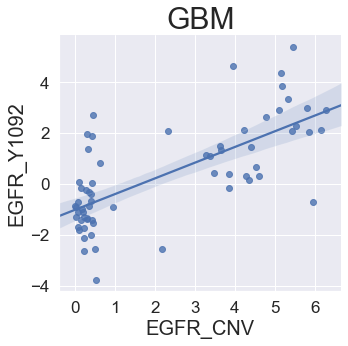

Correlation: 0.7036546954007359
P_value:8.882401626005035e-11


In [8]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1092", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_Gbm_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

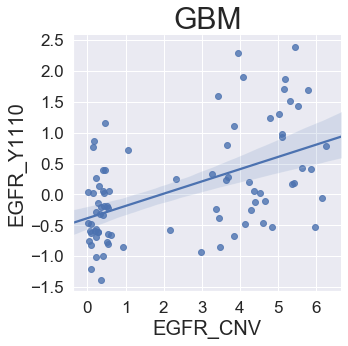

Correlation: 0.5179127088188711
P_value:6.255314235437412e-07


In [9]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1110", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_Gbm_Y1110")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110")

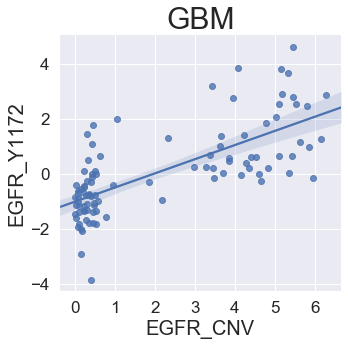

Correlation: 0.7112472011749407
P_value:2.2787391749727397e-16


In [10]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1172", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_GBM_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

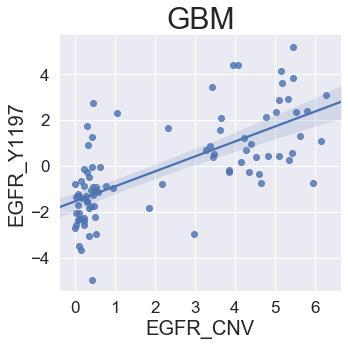

Correlation: 0.6873104154301388
P_value:7.373036188228447e-14


In [11]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y1197", hue = "none", title = "GBM", ra_stats = False ,show_plot = True, save_file_name = "png_files/Sup_Fig1_GBM_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

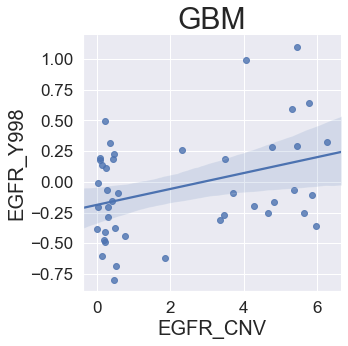

Correlation: 0.3607068330983869
P_value:0.016155920041761064


In [12]:
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y998", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y998")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y998")

In [13]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y316")
phospho_CNV_Tumor = phospho_CNV_Tumor.drop(['EGFR_Y316'], axis=1)

EGFR_Y316 is listed twice because we have results for two different peptides. The first one doesn't have enough data so we will drop it and only plot the second one. 

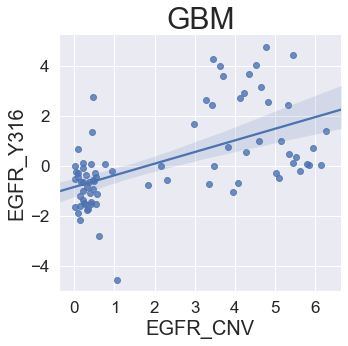

Correlation: 0.5592748231028906
P_value:1.0243042281123128e-07


In [14]:
phospho_CNV_Tumor = phospho_CNV_Tumor.rename(columns={"EGFR_Y316_1": "EGFR_Y316", }) # rename column
p.plot_pearson(phospho_CNV_Tumor ,"EGFR_CNV","EGFR_Y316", hue = "none", title = "GBM", ra_stats = False ,show_plot = True,save_file_name = "png_files/Sup_Fig1_GBM_Y316")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y316")

In [15]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1125")

'Not Enough Data'

In [16]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1125T1145")

'Not Enough Data'

In [17]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y316")

Correlation: 0.5592748231028906
P_value:1.0243042281123128e-07


# Kidney 

In [18]:
phospho_CNV_Tumor = kidney.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")

EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1016', 'EGFR_Y1039', 'EGFR_Y1119', 'EGFR_Y1144', 'EGFR_Y963']


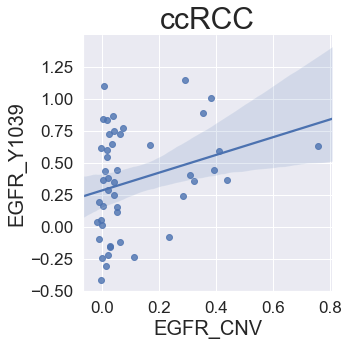

Correlation: 0.28851497059002085
P_value:0.049212865959710334


In [19]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1039",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1039")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1039")

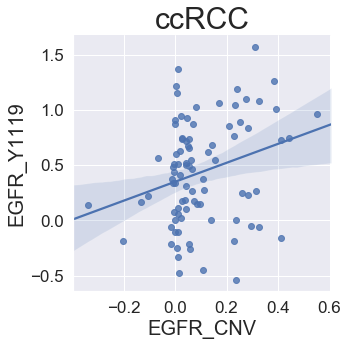

Correlation: 0.27188567841009126
P_value:0.010391791216413421


In [20]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1119",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1119")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1119")

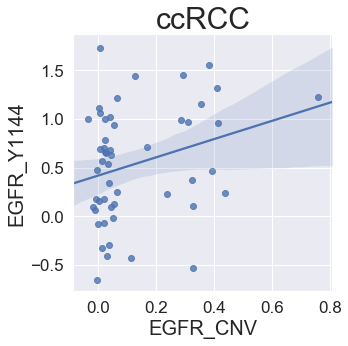

Correlation: 0.2763911088825061
P_value:0.04960839879883299


In [21]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1144",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y1144")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1144")

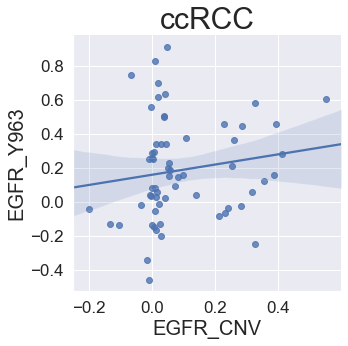

Correlation: 0.1519968335707213
P_value:0.2382648905884251


In [22]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y963",hue = "none", ra_stats = False, title = "ccRCC", show_plot = True, save_file_name = "png_files/Sup_Fig1_ccRCC_Y963")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y963")

In [23]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1016")

'Not Enough Data'

# Ovarian 

In [24]:
phospho_CNV_Tumor = Ovar.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide", "Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1172', 'EGFR_Y1197', 'EGFR_Y869']


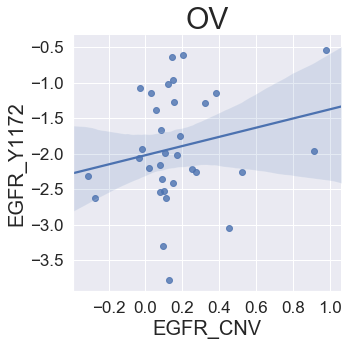

Correlation: 0.21515112287280874
P_value:0.22919425449408157


In [25]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = "none", ra_stats = False,title = "OV", show_plot = True, save_file_name = "png_files/Sup_Fig1_Ovarian_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

In [26]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y869")

'Not Enough Data'

In [27]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

'Not Enough Data'

# Colon

In [28]:
phospho_CNV_Tumor = colon.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")

EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1092', 'EGFR_Y1172', 'EGFR_Y1197']


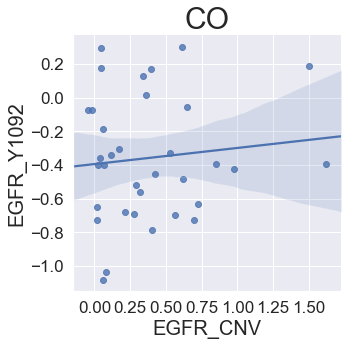

Correlation: 0.10671722068889092
P_value:0.5480350434391613


In [29]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092",hue = "none", ra_stats = False, title = "CO", show_plot = True, save_file_name = "png_files/Sup_Fig1_Colon_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

In [30]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

'Not Enough Data'

In [31]:
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

'Not Enough Data'

# Brca 

In [32]:
phospho_CNV_Tumor = brca.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")

EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_S1039', 'EGFR_S1064', 'EGFR_S1166', 'EGFR_S991', 'EGFR_T1041S1042', 'EGFR_T693', 'EGFR_CNV']


No Y sites

# LUAD

In [33]:
phospho_CNV_Tumor = luad.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1092', 'EGFR_Y1172', 'EGFR_Y1197']


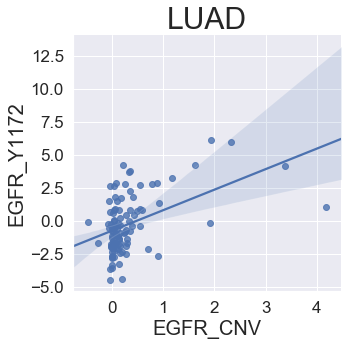

Correlation: 0.47017692146660944
P_value:7.014611131494685e-07


In [34]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Luad_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

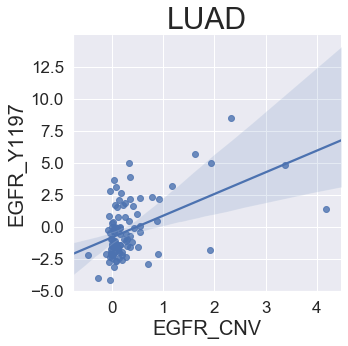

Correlation: 0.5017636428902341
P_value:1.9094474983954976e-07


In [35]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197", hue = 'none', title = "LUAD", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Luad_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

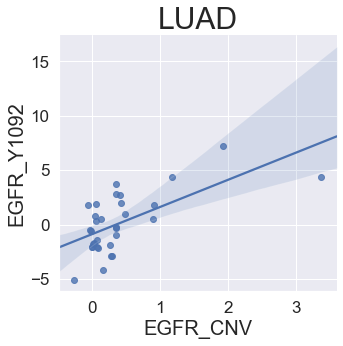

Correlation: 0.6403397550362737
P_value:7.905709366125327e-05


In [36]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092", hue = 'none', title = "LUAD", ra_stats = False,save_file_name = "png_files/Sup_Fig1_Luad_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

# HNSCC

In [37]:
phospho_CNV_Tumor = Hnscc.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1092', 'EGFR_Y1110', 'EGFR_Y1172', 'EGFR_Y1197', 'EGFR_Y727']


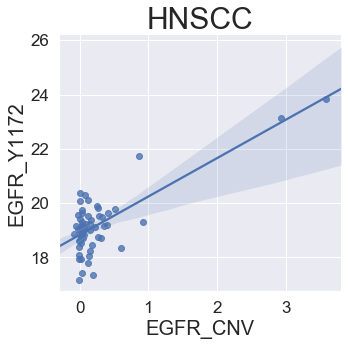

Correlation: 0.7584547976823564
P_value:3.4560670430401392e-12


In [38]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")

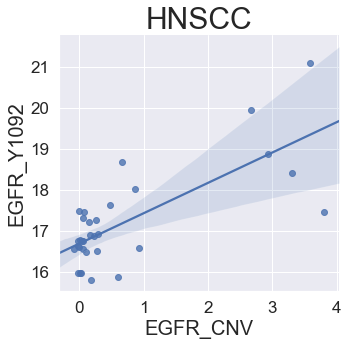

Correlation: 0.73771492456119
P_value:1.4534870866842714e-06


In [39]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1092")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1092")

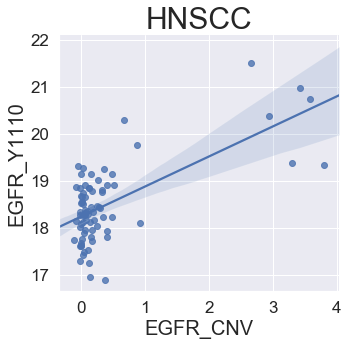

Correlation: 0.6580374863424965
P_value:7.881163387356222e-11


In [40]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1110")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1110")

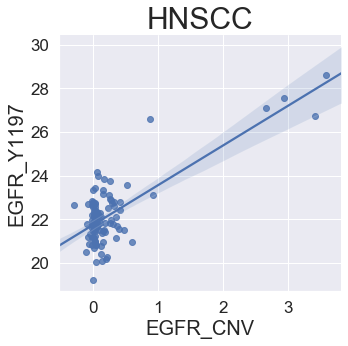

Correlation: 0.7549149385442053
P_value:4.993955456093028e-20


In [41]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Hnscc_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

In [42]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y727", hue = "none", title = "HNSCC", ra_stats = False, show_plot = True)
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y727")

'Not Enough Data'

# LSCC

In [43]:
phospho_CNV_Tumor = Lscc.join_omics_to_omics(df1_name="phosphoproteomics", df2_name="CNV",genes1="EGFR", genes2= "EGFR", tissue_type= "tumor")
drop = ["Peptide","Database_ID"]
phospho_CNV_Tumor = u.reduce_multiindex(df=phospho_CNV_Tumor, levels_to_drop= drop, flatten= True)
phospho_CNV_Tumor.columns = phospho_CNV_Tumor.columns.str.replace("phosphoproteomics_", "")
EGFR_sites = phospho_CNV_Tumor.filter(like='EGFR_Y', axis=1)
print(EGFR_sites.columns.to_list())

['EGFR_Y1172', 'EGFR_Y1197']


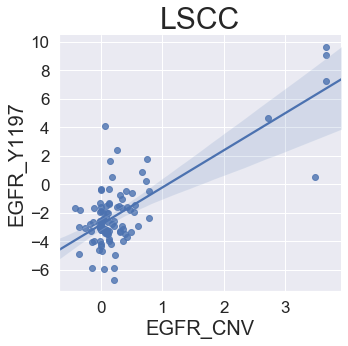

Correlation: 0.7481908471093618
P_value:1.9442687932572956e-18


In [44]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Lscc_Y1197")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1197")

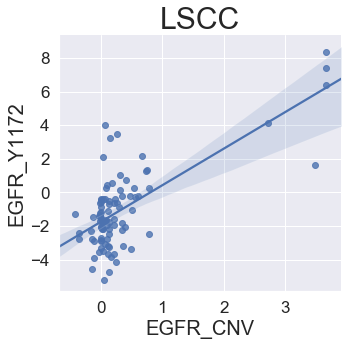

Correlation: 0.7084455607887115
P_value:2.8065607836078615e-15


In [45]:
p.plot_pearson(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172", hue = "none", title = "LSCC" , ra_stats = False, show_plot = True, save_file_name = "png_files/Sup_Fig1_Lscc_Y1172")
print_stats(phospho_CNV_Tumor,"EGFR_CNV","EGFR_Y1172")